In [29]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dataset = openml.datasets.get_dataset(712)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

X.head()

,col_1,col_2
0,1,4.4
1,1,3.9
2,1,4.0
3,1,4.0
4,1,3.5


In [31]:
y.head()

0    78
1    74
2    68
3    76
4    80
Name: col_3, dtype: uint8

In [32]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=5000,
                                  hall_of_fame=100,
                                  n_components=10,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.9,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.72         0.316509        2          0.89436         0.646735      1.29m
   1     9.37         0.707516        4         0.895564         0.742285      1.22m
   2     7.64         0.768316       22         0.897493         0.743134      1.41m
   3     7.49         0.793343        8         0.898322         0.716584      7.65m
   4     6.82         0.805698       13         0.897121         0.685112      1.36m
   5     6.33         0.814162        7           0.9002         0.693063      1.44m
   6     6.34          0.81212       14          0.89915         0.756638      1.47m
   7     6.60         0.828549       13         0.898748         0.773293      1.17m
   8     7.24         0.821596       19            0.901         0.621851  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=-1, parsimony_coefficient=0.0001,
                    population_size=5000, random_state=42, verbose=1)

In [33]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,4.4,0.514539,0.076529,0.153058,0.196563,0.196563,0.740802,-0.076529,0.196563,2.097618,0.196563
1,1.0,3.9,0.552399,0.089479,0.178958,0.154101,0.154101,0.680488,-0.089479,0.154101,1.974842,0.154101
2,1.0,4.0,0.544159,0.086643,0.173287,0.163317,0.163317,0.693147,-0.086643,0.163317,2.000000,0.163317
3,1.0,4.0,0.544159,0.086643,0.173287,0.163317,0.163317,0.693147,-0.086643,0.163317,2.000000,0.163317
4,1.0,3.5,0.589549,0.102266,0.204533,0.112676,0.112676,0.626381,-0.102266,0.112676,1.870829,0.112676


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.1,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.43      1.97896e+13       15          419.597          379.503     17.03s
   1    22.33       4.1365e+06       39          198.652          205.893      1.63m
   2    26.07      4.98527e+06       41          169.001           115.45      1.81m
   3    29.11      1.55041e+07       41          60.1514          40.5065      1.92m
   4    35.85      2.60788e+06       41          53.5289          98.0399      1.83m
   5    40.38      1.34899e+10       35          55.1136          46.3052      1.97m
   6    45.24           176563       65          45.1409          54.3371      1.73m
   7    43.35           541155       45          41.2909           65.632      1.59m
   8    44.30           459275       43          43.2034          46.4223  

SymbolicRegressor(max_samples=0.9, metric='mse', n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [36]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

182    80.726413
135    53.613904
86     51.460199
65     71.443834
207    52.936485
dtype: float64

In [37]:
y_train.head()

182    82
135    58
86     61
65     72
207    51
Name: col_3, dtype: uint8

In [38]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

154    84.079034
215    51.766868
15     73.889714
173    62.724418
158    84.079034
dtype: float64

In [39]:
y_test.head()

154    81
215    52
15     80
173    60
158    94
Name: col_3, dtype: uint8

In [40]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.7312166687452853
R2 Score of test samples whit the model:  0.8077019255578818


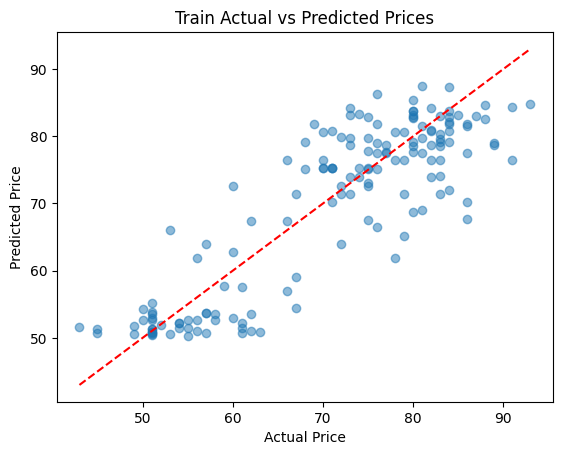

In [41]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

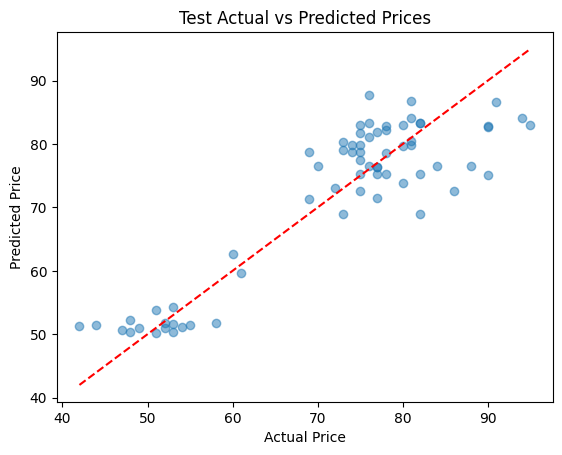

In [42]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()